<a href="https://colab.research.google.com/github/ac-26/Flower-Classification-using-CNN/blob/main/Flower_Cassification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [15]:
data_dir

'./datasets/flower_photos'

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir) / "flower_photos"
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [21]:
import os

print(os.listdir(data_dir))

['LICENSE.txt', 'daisy', 'dandelion', 'tulips', 'roses', 'sunflowers']


In [22]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/daisy/2482982436_a2145359e0_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14816364517_2423021484_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/25360380_1a881a5648.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2476937534_21b285aa46_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2087343668_ef4fb95787_n.jpg')]

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [24]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2535466143_5823e48b63.jpg')]

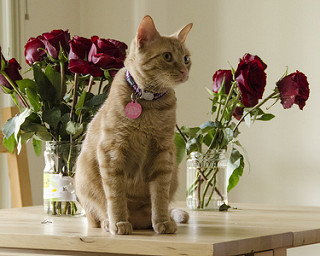

In [25]:
PIL.Image.open(str(roses[1]))

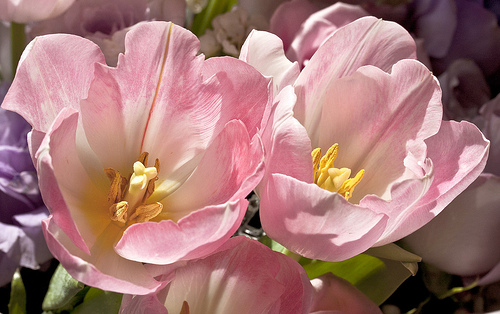

In [26]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

##**Converting these images paths into numpy array with the help of OpenCV**

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [30]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [31]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2535466143_5823e48b63.jpg')]

In [32]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'

In [38]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [37]:
img.shape

(256, 320, 3)

In [39]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [40]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [41]:
X = np.array(X)
y = np.array(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
len(X_train)

2752

In [45]:
len(X_test)

918

In [43]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### **Building the CNN Model**

In [50]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3166 - loss: 1.7120
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6071 - loss: 1.0261
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6773 - loss: 0.8403
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7638 - loss: 0.6577
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8255 - loss: 0.4824
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9177 - loss: 0.2668
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9483 - loss: 0.1786
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9644 - loss: 0.1158
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9863 - loss: 0.0504
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9975 - loss: 0.0251


In [51]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.6374 - loss: 1.7541


[1.6344194412231445, 0.6448801755905151]


### **Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [52]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step


array([[ 6.4221849e+00,  1.6002024e+01, -1.7257403e+00, -9.5941992e+00,
         1.0829487e+00],
       [ 1.4366975e+01, -1.1025720e+01, -6.0420732e+00, -7.6613383e+00,
         7.6756988e+00],
       [ 2.3058734e+00, -2.6235042e+00,  9.6391306e+00, -1.0592158e+01,
         1.5685260e-02],
       ...,
       [-1.7657295e-01, -9.7364354e-01, -2.7835074e-01,  5.8506889e+00,
        -5.8519306e+00],
       [ 4.1369967e+00, -1.3392423e+00,  3.8491716e+00, -8.0974360e+00,
        -2.8899866e-01],
       [-5.0974040e+00, -6.5053778e+00,  2.6870289e+00,  4.9329190e+00,
         2.9330397e-01]], dtype=float32)

In [53]:
score = tf.nn.softmax(predictions[0])

In [54]:
np.argmax(score)

np.int64(1)

In [55]:
y_test[0]

np.int64(1)

### **Now we will apply Data Augmentation to reduce Overfitting**

In [1]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

NameError: name 'keras' is not defined

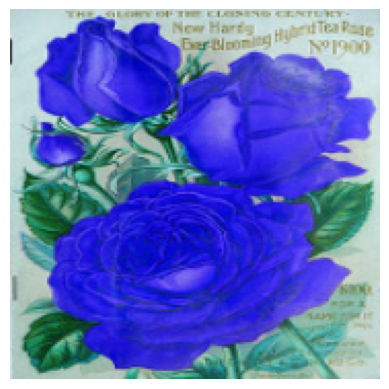

In [63]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### **Train the model using data augmentation and a drop out layer**

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

In [ ]:
model.evaluate(X_test_scaled,y_test)

### **Now we observe that there is a significant change in the evaluation of y_test**